# Google Search Trends Updated Dataframe Cleaning and Wrangling
## Based on entire timeline from 10/24/2006 to 12/31/2023
## United States

## Contents
## 01. Import libraries and dataset
## 02. Cleaning and wrangling
## 03. Quick EDA stats
## 04. Data export

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [2]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Import google search trends df with updates

df = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'google_trends_us_whole_career_dec_2023_update.csv'), index_col = 0)

# 02. Cleaning

In [4]:
df.head()

,Category: All categories
Month,Taylor Swift: (United States)
2006-11,4
2006-12,4
2007-01,4
2007-02,4


In [9]:
# Import again to shift header
# Skip the first row and use it as header

df = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'google_trends_us_whole_career_dec_2023_update.csv'), header=None, skiprows=1)

In [10]:
df

,0,1
0,Month,Taylor Swift: (United States)
1,2006-11,4
2,2006-12,4
3,2007-01,4
4,2007-02,4
...,...,...
202,2023-08,63
203,2023-09,79
204,2023-10,100
205,2023-11,77


In [11]:
# Reset the header
df.columns = df.iloc[0]

In [12]:
df

,Month,Taylor Swift: (United States)
0,Month,Taylor Swift: (United States)
1,2006-11,4
2,2006-12,4
3,2007-01,4
4,2007-02,4
...,...,...
202,2023-08,63
203,2023-09,79
204,2023-10,100
205,2023-11,77


In [13]:
# Drop the first row (old header row) by resetting the index
df = df.drop(0).reset_index(drop=True)

In [14]:
df

,Month,Taylor Swift: (United States)
0,2006-11,4
1,2006-12,4
2,2007-01,4
3,2007-02,4
4,2007-03,4
...,...,...
201,2023-08,63
202,2023-09,79
203,2023-10,100
204,2023-11,77


In [15]:
df.columns

Index(['Month', 'Taylor Swift: (United States)'], dtype='object', name=0)

### Column renames

In [ ]:
df.columns

In [16]:
df.rename(columns = {'Month': 'date', 'Taylor Swift: (United States)': 'us_search_score', }, inplace=True)

In [17]:
df.columns

Index(['date', 'us_search_score'], dtype='object', name=0)

In [18]:
df.tail(20)

,date,us_search_score
186,2022-05,14
187,2022-06,9
188,2022-07,10
189,2022-08,13
190,2022-09,13
191,2022-10,30
192,2022-11,66
193,2022-12,20
194,2023-01,18
195,2023-02,21


In [ ]:
# Drop index

df

In [19]:
df.shape

(206, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             206 non-null    object
 1   us_search_score  206 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [21]:
df.describe()

,date,us_search_score
count,206,206
unique,206,50
top,2006-11,9
freq,1,16


### Duplicates

In [22]:
df_dupes = df[df.duplicated()]

In [23]:
df_dupes

,date,us_search_score


### Data types

In [24]:
# Check for mixed data types

for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)                                                                             
    if len (df[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_26016\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_26016\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)


In [25]:
df.dtypes

0
date               object
us_search_score    object
dtype: object

In [26]:
# Convert the chart_week column to datetime

df['date'] = pd.to_datetime(df['date'])

In [27]:
df['date'].dtype

dtype('<M8[ns]')

In [28]:
# Convert search score to int

df['us_search_score'] = df['us_search_score'].astype(int)

In [29]:
df.dtypes

0
date               datetime64[ns]
us_search_score             int32
dtype: object

### Check missing values

In [32]:
df.isnull().sum()

0
date               0
us_search_score    0
dtype: int64

# 03. Quick EDA stats

<Axes: ylabel='Frequency'>

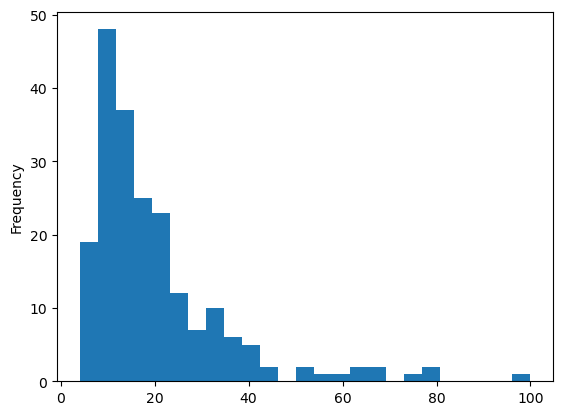

In [35]:
# Histo of scores

df['us_search_score'].plot.hist(bins=25)

Observations: The data is skewed right. Only once did Taylor have the highest search score compared to any other search in the United States.

In [36]:
df['us_search_score'].value_counts(dropna=False)

us_search_score
9      16
8      14
10     11
12     10
20      9
14      9
15      9
13      9
19      8
4       7
11      7
18      7
22      6
16      6
7       6
23      5
28      5
26      4
25      4
34      4
5       4
31      4
17      4
21      3
37      3
30      2
36      2
27      2
40      2
32      2
24      2
6       2
51      1
77      1
100     1
79      1
63      1
60      1
53      1
67      1
39      1
66      1
44      1
62      1
41      1
56      1
43      1
38      1
42      1
74      1
Name: count, dtype: int64

In [42]:
top_dates = df.loc[df['us_search_score'] > 70]

In [43]:
top_dates

,date,us_search_score
202,2023-09-01,79
203,2023-10-01,100
204,2023-11-01,77
205,2023-12-01,74


All top dates occured in the final four months of 2023.

<Axes: xlabel='date', ylabel='us_search_score'>

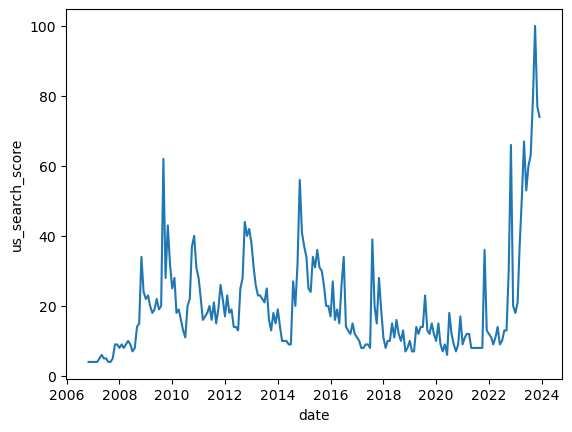

In [37]:
# Create lineplot

sns.lineplot(data=df, x="date", y="us_search_score")

Observations: While Taylor's search popularity has changed over time, 2023 showed a large increase in search scores. 2009 and 2015 were also significant years.

# 04. Export

In [44]:
# Export billboard 100 songs with Taylor Swift only, during her career
# Includes all song information

df.to_csv(os.path.join(path, '02 Manipulated Data', 'google_trends_whole_career.csv'))